# NAICS API calls

In [101]:
from matplotlib import pyplot as plt
import requests
import pandas as pd
import seaborn as sns

In [102]:
# initialize an empty master DataFrame
master_df = pd.DataFrame()

year_url_dict = {
    2017: "https://api.census.gov/data/2017/cbp?get=EMP,NAME&for=combined%20statistical%20area:*&NAICS2017=51",
    2018: "https://api.census.gov/data/2018/cbp?get=EMP,NAME&for=combined%20statistical%20area:*&NAICS2017=51",
    2019: "https://api.census.gov/data/2019/cbp?get=EMP,NAME&for=combined%20statistical%20area:*&NAICS2017=51",
    2020: "https://api.census.gov/data/2020/cbp?get=EMP,NAME&for=combined%20statistical%20area:*&NAICS2017=51",
    2021: "https://api.census.gov/data/2021/cbp?get=EMP,NAME&for=combined%20statistical%20area:*&NAICS2017=51",
}

In [103]:
# Loop through the years and merge data into the master DataFrame
for year, url in year_url_dict.items():
    response = requests.get(url)

    if response.status_code == 200:
        # Extract the relevant data from the API response
        api_data = response.json()[1:]  # Skip the header row
        api_df = pd.DataFrame(api_data, columns=["EMP", "LOCATION", "NAICS2017","CSA"])
        
        # Rename the 'EMP' column to 'emp_YEAR' to match the current year
        api_df.rename(columns={"EMP": f"emp_{year}"}, inplace=True)

        if master_df.empty:
            # If it's the first year, set the master DataFrame to the cleaned data
            master_df = api_df
        else:
            # Merge new data with the master DataFrame using 'LOCATION' and 'CSA' as keys
            master_df = pd.merge(master_df, api_df, on=["LOCATION","CSA"], how="right")

C:\Users\levil\AppData\Local\Temp\ipykernel_9880\3015988910.py:18: FutureWarning: Passing 'suffixes' which cause duplicate columns {'NAICS2017_x'} in the result is deprecated and will raise a MergeError in a future version.
  master_df = pd.merge(master_df, api_df, on=["LOCATION","CSA"], how="right")


In [104]:
# List of columns to drop
columns_to_drop = ['NAICS2017_x', 'NAICS2017_y', 'NAICS2017_x', 'NAICS2017_y', 'NAICS2017']

master_df.drop(columns=columns_to_drop, inplace=True)

In [105]:
print(master_df.head())

  emp_2017                                LOCATION  CSA emp_2018 emp_2019  \
0    11142              Albany-Schenectady, NY CSA  104    11518    10925   
1     9069  Albuquerque-Santa Fe-Las Vegas, NM CSA  106     8686     7819   
2     1516                 Amarillo-Borger, TX CSA  108     1574     1484   
3     2961         Appleton-Oshkosh-Neenah, WI CSA  118     3005     2922   
4     2381               Asheville-Brevard, NC CSA  120     2256     2217   

  emp_2020 emp_2021  
0    10269     9441  
1     7553     6541  
2     1490     1334  
3     2774     2286  
4     2401     1957  


### Exporting the data as a csv so results can be reproduced.

Data is exported into a csv file named 'Cen_11_21.csv' as a master data frame regarding all information from 2017 to 2021 respectively. 

In [108]:
master_df.to_csv('Cen_17_21.csv', index=False, mode='w')

### What years had the lowest employement numbers?

The years with the lowest employment numbers were 2017 and 2021 using total of each emp_YEAR during the years of 2017 to 2021.


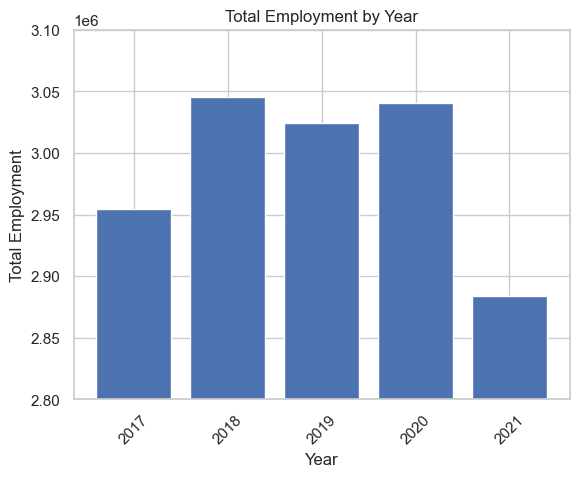

In [121]:
year_columns = ["2017","2018","2019","2020","2021"]
yearly_employment = [2954405,3045024,3023971,3040214,2883885] 
plt.bar(year_columns, yearly_employment)
plt.title('Total Employment by Year')
plt.xlabel('Year')
plt.ylabel('Total Employment')
plt.xticks(rotation=45)

# Zooms in on the graph around the 3,000,00 range
plt.ylim(2800000, 3100000)

plt.show()

### Of the all of the locations using combined statistical area the top 15 employement numbers in year ___ we can notice ____.

In [ ]:
## Showcase with a visual